In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import plotly
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt

In [2]:
data= pd.read_csv("Consumer_Complaints.csv")

In [3]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


In [4]:
print("shape of the dataset is",data.shape)
print(data.dtypes)

shape of the dataset is (903983, 18)
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


In [5]:
data.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
data.isnull().sum()

Date received                        0
Product                              0
Sub-product                     235160
Issue                                0
Sub-issue                       477597
Consumer complaint narrative    704013
Company public response         646002
Company                              0
State                             9225
ZIP code                          9278
Tags                            777945
Consumer consent provided?      528549
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              135408
Complaint ID                         0
dtype: int64

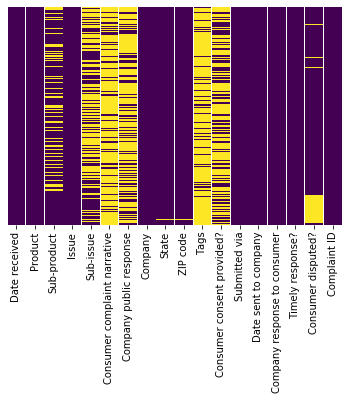

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [8]:
mode_value ='No'

In [9]:
data.fillna(mode_value, inplace=True)

In [10]:
data.isnull().fillna(mode_value,inplace =True)


In [11]:
data.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

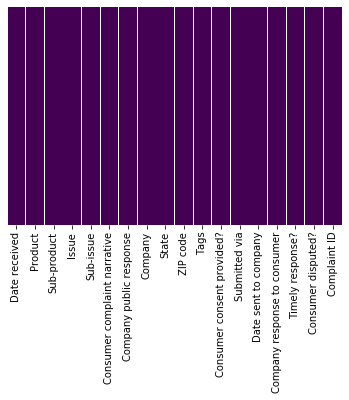

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [13]:
data[['Date received', 'Product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       ]].describe().transpose()

,count,unique,top,freq
Date received,903983,2176,9/8/2017,3551
Product,903983,18,Mortgage,242194
Issue,903983,166,"Loan modification,collection,foreclosure",112315
Sub-issue,903983,218,No,477597
Consumer complaint narrative,903983,195318,No,704013
Company public response,903983,11,No,646002
Company,903983,4504,"BANK OF AMERICA, NATIONAL ASSOCIATION",70488
State,903983,63,CA,128373
ZIP code,903983,28786,No,9278
Tags,903983,4,No,777945


In [14]:
data.Product.value_counts()

Mortgage                                                                        242194
Debt collection                                                                 171567
Credit reporting                                                                140424
Credit card                                                                      89190
Bank account or service                                                          86207
Credit reporting, credit repair services, or other personal consumer reports     59186
Student loan                                                                     38612
Consumer Loan                                                                    31608
Credit card or prepaid card                                                      11921
Checking or savings account                                                       9947
Payday loan                                                                       5546
Money transfers                            

In [15]:
subprod=data['Sub-product'].value_counts()
subprod.head(60)

No                                            235160
Other mortgage                                 86633
Conventional fixed mortgage                    70617
Checking account                               66499
Credit reporting                               57906
Other (i.e. phone, health club, etc.)          44561
I do not know                                  34773
Credit card                                    28703
FHA mortgage                                   26615
Conventional adjustable mortgage (ARM)         25382
Non-federal student loan                       25166
Medical                                        21211
Other bank product/service                     17826
Vehicle loan                                   17782
Federal student loan servicing                 13911
Home equity loan or line of credit             11626
Installment loan                                9557
General-purpose credit card or charge card      9225
Other debt                                    

In [74]:
data['Issue'].value_counts()[:10].iplot(kind='bar',title='Top 10 issues\n',fontsize=14,color='orange')

In [44]:
#top 10 companies
data['Company'].value_counts()[:10].iplot(kind='barh',title='Top 10 Companies\n',fontsize=14,color='blue')

In [43]:
#top 10 products
data['Product'].value_counts()[:10].iplot(kind='barh',title='Top 10 Products\n',fontsize=14,color='springgreen')

In [19]:
data['Date'] =pd.to_datetime(data['Date received'])

#Extracting Year.
data['Year'] =data['Date'].dt.year

#Extracting Month.
data['Month'] =data['Date'].dt.month_name()

#Extracting Weekdays

data['Week_Days'] = data['Date'].dt.day_name()

In [20]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date,Year,Month,Week_Days
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",No,No,No,M&T BANK CORPORATION,MI,48382,...,Referral,3/17/2014,Closed with explanation,Yes,No,759217,2014-03-12,2014,March,Wednesday
1,10/1/2016,Credit reporting,No,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,...,Web,10/5/2016,Closed with explanation,Yes,No,2141773,2016-10-01,2016,October,Saturday
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,No,I purchased a new car on XXXX XXXX. The car de...,No,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,...,Web,10/20/2016,Closed with explanation,Yes,No,2163100,2016-10-17,2016,October,Monday
3,6/8/2014,Credit card,No,Bankruptcy,No,No,No,AMERICAN EXPRESS COMPANY,ID,83854,...,Web,6/10/2014,Closed with explanation,Yes,Yes,885638,2014-06-08,2014,June,Sunday
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,No,No,"CITIBANK, N.A.",VA,23233,...,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760,2014-09-13,2014,September,Saturday


In [42]:
data['Week_Days'].value_counts().iplot(kind ='barh',title ='Number of Complaints per Weekday')

In [41]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

pd.crosstab(data['Year'],data['Month']).iplot(kind='bar',barmode='stack',
                                                        title='Number of Complaints per Month')

In [47]:
grouped = data.groupby(['Company response to consumer']).size()
pie_chart = go.Pie(labels=grouped.index,values=grouped,
                  title='Company Response to the Customer')
iplot([pie_chart])

In [48]:
import folium

In [55]:
mortgage_map = folium.Map([43, -100], zoom_start=4)

mortgage_map.choropleth(
    
    data=df_mapping,
    columns=['State', 'Mortgage'],
    key_on='feature.id',
    fill_color='YlGn',
)


#m.save(os.path.join('results', 'GeoJSON_and_choropleth_9.html'))
mortgage_map

NameError: name 'df_mapping' is not defined

In [54]:
data['State'].unique()

array(['MI', 'AL', 'PA', 'ID', 'VA', 'MN', 'CA', 'FL', 'TX', 'NV', 'NY',
       'NE', 'MT', 'ME', 'WI', 'WA', 'RI', 'NJ', 'IL', 'MS', 'OH', 'GA',
       'MD', 'MA', 'SC', 'CO', 'SD', 'LA', 'OR', 'IA', 'IN', 'NC', 'TN',
       'VT', 'AZ', 'DE', 'No', 'MO', 'KS', 'WV', 'HI', 'ND', 'CT', 'WY',
       'NH', 'MP', 'DC', 'NM', 'KY', 'UT', 'AR', 'OK', 'PR', 'AP', 'AK',
       'VI', 'MH', 'AA', 'AE', 'GU', 'FM', 'AS', 'PW'], dtype=object)

### Random Forest on Consumer Complaints Dataset
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual



#### Importing the library to Label Encode and One-Hot Encode our categorical column

In [56]:

labelencoder = LabelEncoder()
onehotencoder =OneHotEncoder()

In [57]:
data['Consumer_encode']= labelencoder.fit_transform(data['Consumer disputed?'])

In [58]:
enc = OneHotEncoder(handle_unknown='ignore')
consumer_data1 = pd.DataFrame(enc.fit_transform(data[['Product']]).toarray())
df = data.join(consumer_data1)

#### Splitting Independent features from Dependent ones

In [59]:
x = df.iloc[:,24:41].values
y = df['Consumer_encode'].values

Splitting the dataset into the Training set and Test set

In [60]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size =0.25, random_state =10)

Feature Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Fitting Random Forest Classification to the Training set

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state =10)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

Predicting the Test set results

In [63]:
y_pred = classifier.predict(x_test)

Making the Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[188549      0]
 [ 37447      0]]


Model Accuracy Score

In [65]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8343023770332219
